<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C1/C1.html"><img src="../data/C1_nav.png" width="100"  style="float:right;" alt="C1"></a>
<h1>Symbolic Format: MIDI</h1>        
</div>

<br />

<p>
Following Section 1.2.2 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we have in this a notebook a look at the MIDI standard, which is often used to encode symbolic music. 
</p> 

## MIDI Standard

**MIDI** (Musical Instrument Digital Interface) was originally developed as an industry standard to get digital electronic musical instruments from different manufacturers to work and play together. It was the advent of MIDI in 1981&ndash;1983 that caused a rapid growth of the electronic musical instrument market. MIDI allows a musician to remotely and automatically control an electronic instrument or a digital synthesizer in real time. As an example, let us consider a digital piano, where a musician pushes down a key of the piano keyboard to start a sound. The intensity of the sound is controlled by the velocity of the keystroke. Releasing the key stops the sound. Instead of physically pushing and releasing the piano key, the musician may also trigger the instrument to produce the same sound by transmitting suitable MIDI messages, which encode the note-on, the velocity, the note-off, and other information. These MIDI messages may be automatically generated by some other electronic instrument or may be provided by a computer. It is an important fact that MIDI does not represent  musical sound directly, but only represents performance information encoding the instructions about how an instrument has been played or how music is to be produced.

## MIDI Representation

The original MIDI standard was later augmented to include the **Standard MIDI File (SMF)** specification, which describes how MIDI data should be stored on a computer. In the following, we denote SMF files simply as **MIDI files**
or **MIDI representations**. The SMF file format allows users to exchange MIDI data regardless of the computer operating system and has provided a basis for an efficient internet-wide distribution of music data, including numerous websites devoted to the sale and exchange of music. A MIDI file contains a list of MIDI messages together with timestamps, which are required to determine the timing of the messages. Further information (called meta messages) is relevant to software that processes MIDI files.

The most important MIDI messages are the note-on and the note-off commands, which correspond to the start and the end of a note, respectively. Each note-on and note-off message is, among others, equipped with a MIDI note number, a value for the key velocity, a channel specification, as well as a timestamp. The **MIDI note number** is an integer between $0$ and $127$ and encodes a note's pitch, where MIDI pitches are based on the equal-tempered scale. Similarly to an acoustic piano, where the $88$ keys of the keyboard correspond to the musical pitches A0 to C8, the MIDI note numbers encode, in increasing order, the musical pitches C0 to G$^\sharp$9. For example, the concert pitch A4 has the MIDI note number $69$.

<img src="../data/C1/FMP_C1_MIDI-NoteNumbers.png" width="600px" align="center" alt="FMP_C1_MIDI-NoteNumbers">

The **key velocity** is again an integer between $0$ and $127$, which controls the intensity of the sound&mdash;in the case of a note-on event it determines the volume, whereas in the case of a note-off event it controls the decay during the release phase of the tone. The exact interpretation of the key velocity, however, depends on the respective instrument or synthesizer.
The **MIDI channel** is an integer between $0$ and $15$. Intuitively speaking, this number prompts the synthesizer to use the instrument that has been previously assigned to the respective channel number. Finally, the **time stamp** is an integer value that represents how many clock pulses or **ticks** to wait before the respective note-on or note-off command is executed. 

The following figure shows various symbolic music representations of the first twelve notes of Beethoven's Fifth including a sheet music representation, a MIDI representation (in a simplified, tabular form), and a piano-roll representation.

<img src="../data/C1/FMP_C1_F13.png" width="600px" align="center" alt="FMP_C1_MIDI-NoteNumbers">

## Timing Information in MIDI 

An important feature of the MIDI format is that it can handle musical as well as physical onset times and note durations. Similarly to sheet music representations, MIDI can express timing information in terms of musical entities rather than using absolute time units such as microseconds. To this end, MIDI subdivides a quarter note into basic time units referred to as **clock pulses** or **ticks**. The number of pulses per quarter note (PPQN) is to be specified at the beginning, in the so-called **header** of a MIDI file, and refers to all subsequent MIDI messages. A common value is 120 PPQN, which determines the resolution of the time stamps associated to note events. 

Like the sheet music representation, MIDI also allows for encoding and storing absolute timing information, however, at a much finer resolution level and in a more flexible way. To this end, one can include additional tempo messages that specify the number of microseconds per quarter note. From the tempo message, one can compute the absolute duration of a tick. For example, having 600000 $\mu$s per quarter note and 120, each tick corresponds to 5000 $\mu$s. Furthermore, one can derive from the tempo message the number of quarter notes played in a minute, which yields the tempo measured in **beats per minute** (BPM). For example, the 600000 $\mu$s per quarter note correspond to 100 BPM.  While the number of pulses per quarter note is fixed throughout a MIDI file, the absolute tempo information may be changed by inserting a tempo message between any two note-on or other MIDI messages. This makes it possible to account not only for global tempo information but also for local tempo changes such as accelerandi, ritardandi, or fermate.

## Processing MIDI Files Using `PrettyMIDI`

The [file format specifications for MIDI](https://www.midi.org/specifications-old/category/smf-specifications) are complex and go beyond the scope of the FMP notebooks. The good news is that there are various software tools for parsing, manipulating, synthesizing, and storing MIDI files. In the following, we introduce the Python package [`PrettyMIDI`](https://github.com/craffel/pretty-midi) for reading MIDI files. Furthermore, this package transforms the (often cryptic) MIDI messages into a list of easy-to-understand note events. The following code cell parses a MIDI file, converts the data into a standard Python list, and displays the first MIDI events in a table. We continue with our Beethoven example from above.

In [1]:
import os
import sys

from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import colors
import pretty_midi
import pandas as pd
import IPython.display as ipd

sys.path.append('..')
import LibFMP.C1

fn = os.path.join('..', 'data', 'C1', 'FMP_C1_F13a_Beethoven_FateMotive_Sibelius-Tracks.mid')
midi_data = pretty_midi.PrettyMIDI(fn)
midi_list = []

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])
html = df.to_html(index=False)
ipd.HTML(html)

Start,End,Pitch,Velocity,Instrument
0.25,0.50,43,113,Piano
0.25,0.50,55,76,Piano
0.25,0.50,67,76,Piano
0.50,0.75,43,113,Piano
0.50,0.75,55,76,Piano
0.50,0.75,67,76,Piano
0.75,1.00,43,113,Piano
0.75,1.00,55,76,Piano
0.75,1.00,67,76,Piano
1.00,2.00,39,126,Piano


`PrettyMIDI` also offers functionality to synthesize the MIDI data with sinusoidal sounds, without paying attention to the actual instruments playing the notes.

In [2]:
Fs = 22050
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

Finally, we plot the MIDI data in a piano roll representation, where the color (given as RGBA value) of each rectangle is determined by a note's instrument (RBG value) and velocity (alpha parameter, opacity). We now use a visualization function from `LibFMP` that has been introduced in the notebook on our [CSV format for symbolic music](../C1/C1S2_CSV.html).

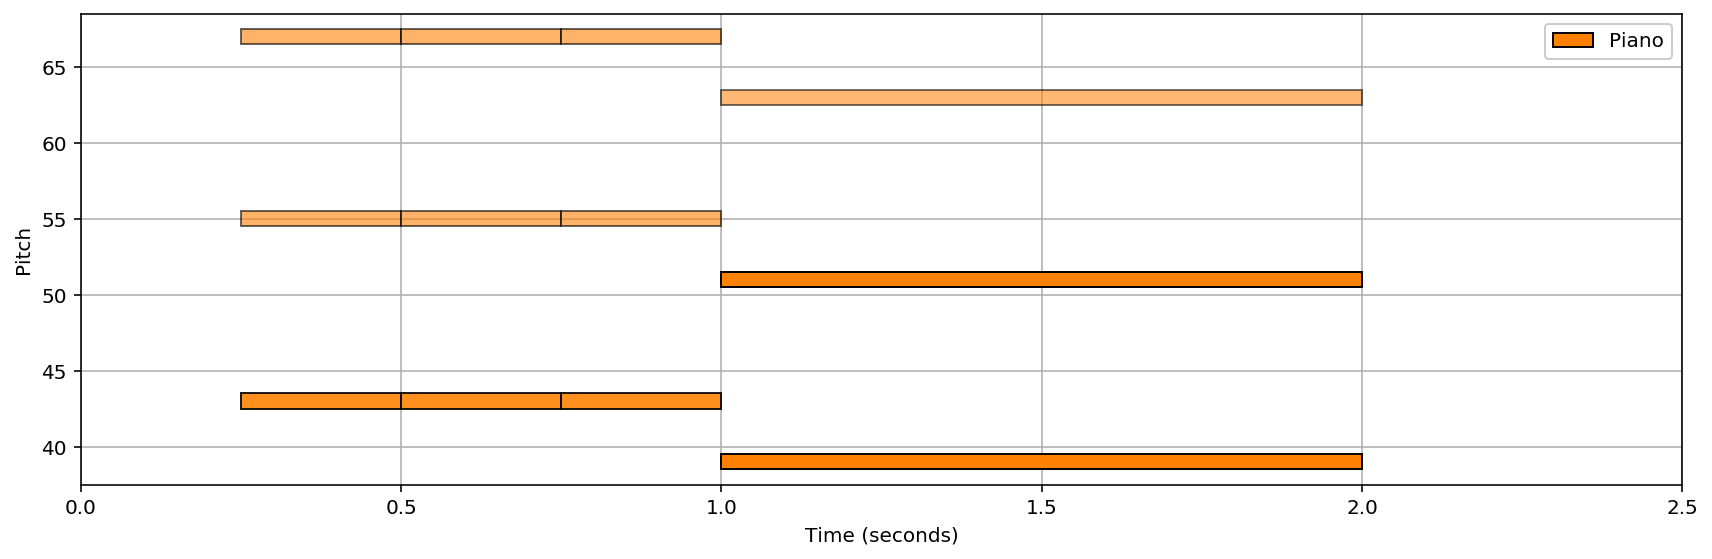

In [3]:
def midi_to_list(midi_data):
    midi_list = []

    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            end = note.end
            pitch = note.pitch
            velocity = note.velocity
            midi_list.append([start, end-start, pitch, velocity/128., instrument.name])
            
    return midi_list

score = midi_to_list(midi_data)
LibFMP.C1.visualize_piano_roll(score, figsize=(12, 4), velocity_alpha=True);

The next example reads and visualizes a MIDI file for the beginning of the four-voice Fugue BWV 846 in C major by Johann Sebastian Bach. In the MIDI file, the four voices (soprano, alto, tenor, basso) are encoded by four different MIDI channels.

<img src="../data/C1/FMP_C1_F12_Bach_BWV846_SheetMusic.png" width="700px" align="left" alt="C1">
<br clear="all" />
<audio src="../data/C1/FMP_C1_F12_Bach_BWV846_Sibelius.mp3" type="audio/mpeg" controls="controls"></audio>-->
<!--<audio src="../data/C1/FMP_C1_F12_Bach_BWV846_Sibelius-Tracks.mp3" type="audio/mpeg" controls="controls"></audio>-->
<audio src="../data/C1/FMP_C1_F12_Bach_BWV846_Sibelius-Tracks_SingingVoices.mp3" type="audio/mpeg" controls="controls"></audio>


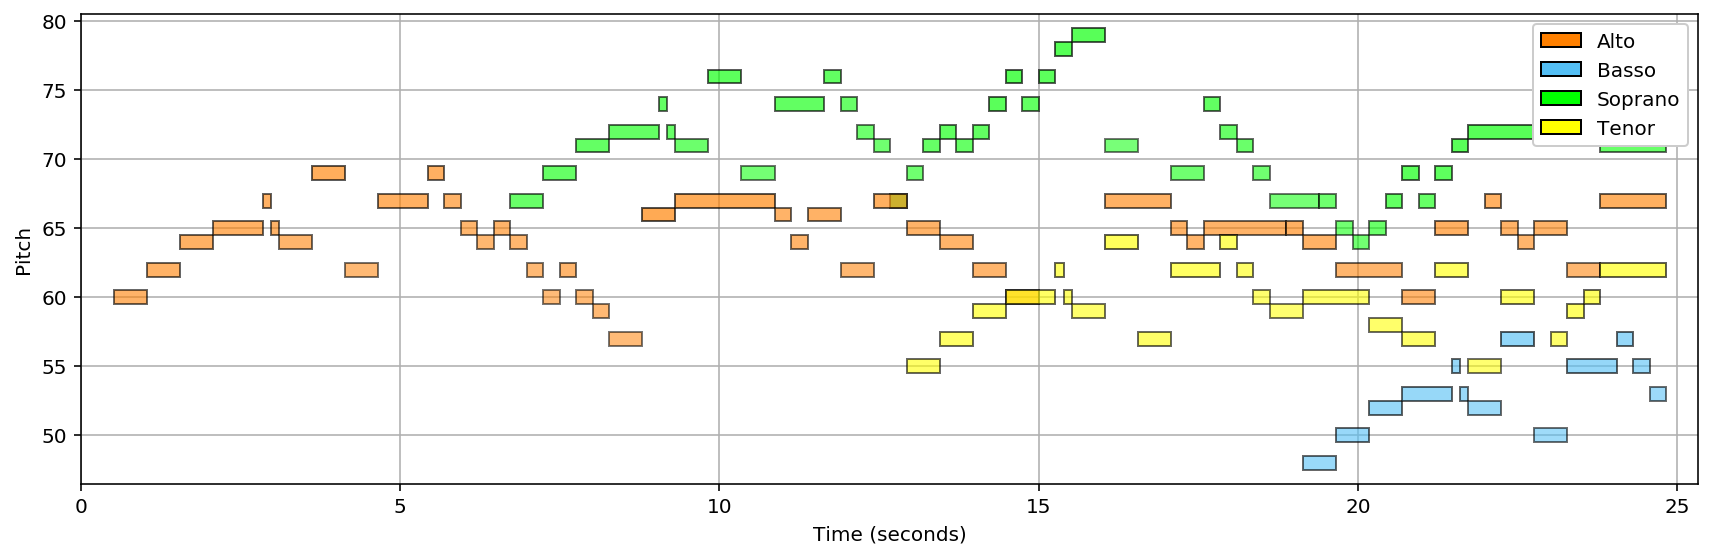

In [4]:
fn = os.path.join('..', 'data', 'C1', 'FMP_C1_F12_Bach_BWV846_Sibelius-Tracks.mid')
midi_data = pretty_midi.PrettyMIDI(fn)
score = midi_to_list(midi_data)
LibFMP.C1.visualize_piano_roll(score, figsize=(12, 4), velocity_alpha=True);

## Conversion from MIDI to CSV

We can convert a list of note events into a CSV file with the [`to_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method of a `pd.DataFrame`. In the following code cell, we convert a MIDI file into a CSV file as used in the [FMP notebook on the CSV format](../C1/C1S2_CSV.html).

In [5]:
fn_in = os.path.join('..', 'data', 'C1', 'FMP_C1_F12_Bach_BWV846_Sibelius-Tracks.mid')
fn_out = os.path.join('..', 'output', 'C1', 'FMP_C1_F12_Bach_BWV846_Sibelius-Tracks.csv')
midi_data = pretty_midi.PrettyMIDI(fn_in)
score = midi_to_list(midi_data)
df = pd.DataFrame(score, columns=['Start', 'Duration', 'Pitch', 'Velocity', 'Instrument'])
df.to_csv(fn_out, sep=';', quoting=2, float_format='%.3f', index=False)

print('Score as list:')
print(score[0:3])
print('\n')

print('Score as pandas DataFrame')
print(df.loc[0:2,:])
print('\n')

print('Score as CSV')
print(fn_out)
with open(fn_out, 'r', encoding='utf-8') as file:
    csv_str = file.readlines()
print(csv_str[0:4])

Score as list:
[[6.724133, 0.5172410000000003, 67, 0.59375, 'Soprano'], [7.241374, 0.5172410000000003, 69, 0.6015625, 'Soprano'], [7.758615000000001, 0.5172410000000003, 71, 0.609375, 'Soprano']]


Score as pandas DataFrame
      Start  Duration  Pitch  Velocity Instrument
0  6.724133  0.517241     67  0.593750    Soprano
1  7.241374  0.517241     69  0.601562    Soprano
2  7.758615  0.517241     71  0.609375    Soprano


Score as CSV
..\output\C1\FMP_C1_F12_Bach_BWV846_Sibelius-Tracks.csv
['"Start";"Duration";"Pitch";"Velocity";"Instrument"\n', '"6.724";"0.517";67;"0.594";"Soprano"\n', '"7.241";"0.517";69;"0.602";"Soprano"\n', '"7.759";"0.517";71;"0.609";"Soprano"\n']


## Python Package `music21`

The package [`music21`](https://web.mit.edu/music21/), which will be introduced in more detail in the [FMP notebook on MusicXML](../C1/C1S2_MusicXML.html), offers similar plotting functionalities.

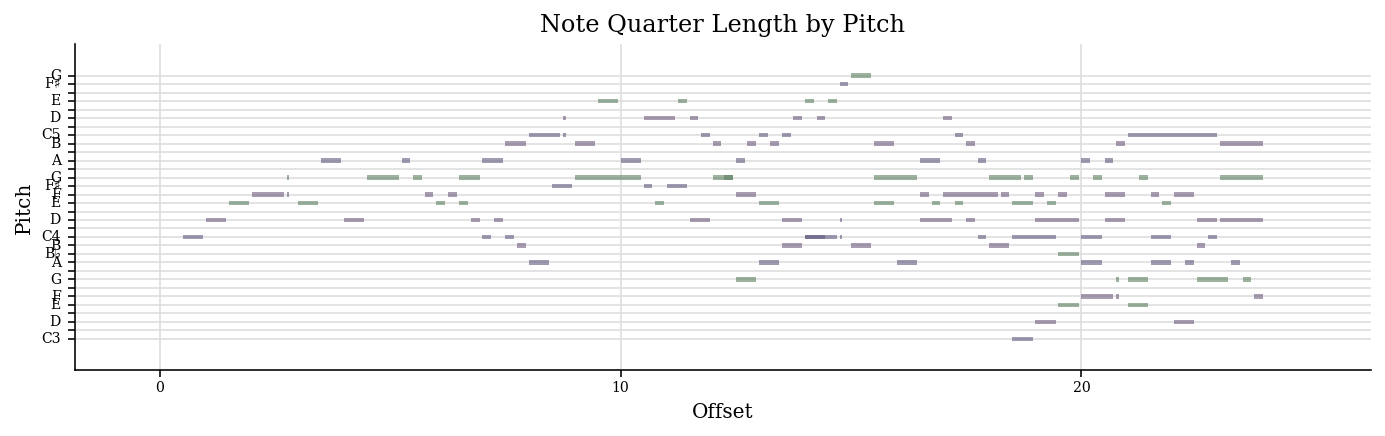

In [6]:
import music21 as m21

fn = os.path.join('..', 'data', 'C1', 'FMP_C1_F12_Bach_BWV846_Sibelius-Tracks.mid')
s = m21.converter.parse(fn)
s.plot('pianoroll', figureSize=(12, 3))

## Python Package `pypianoroll`

Another package for piano roll visualizations is [`pypianoroll`](https://github.com/salu133445/pypianoroll). The functions to convert a midi file to a list of note events as well as the pianoroll visualization function have been included into `LibFMP`. In the following code cell, we call those `LibFMP` functions:

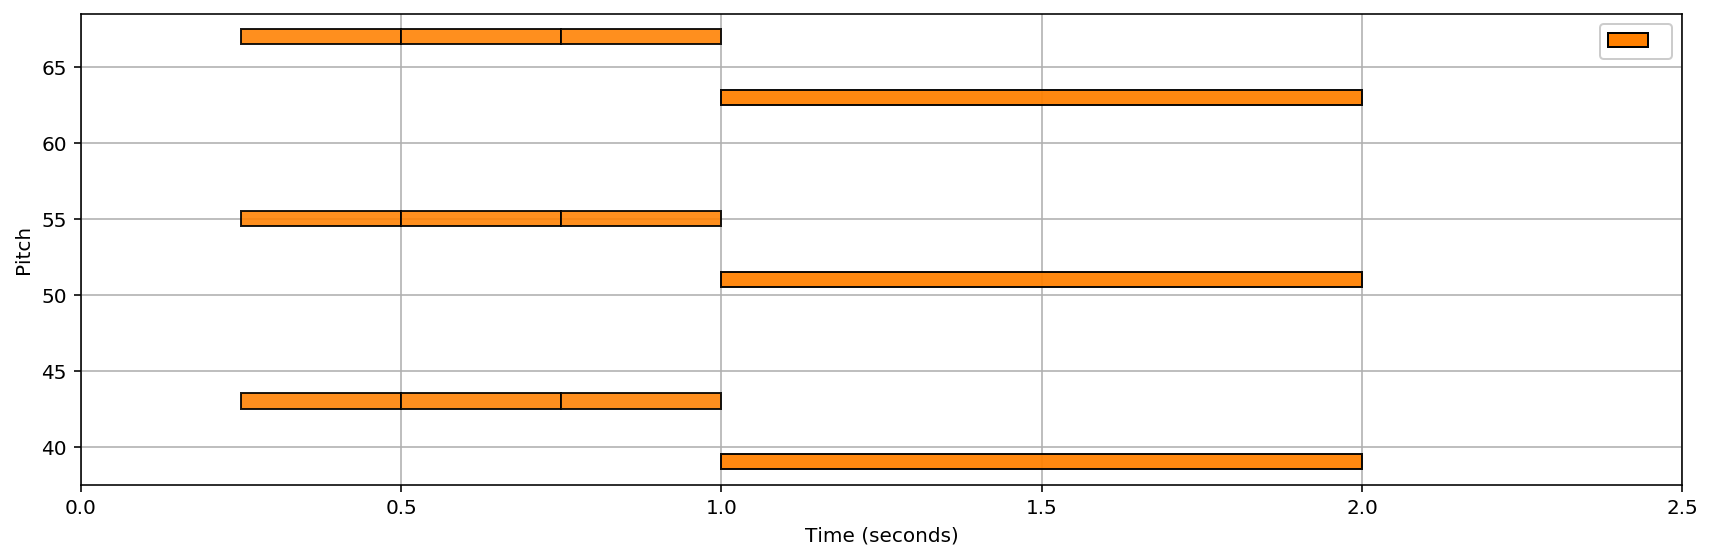

In [7]:
import sys
sys.path.append('..')
import LibFMP.C1

fn = os.path.join('..', 'data', 'C1', 'FMP_C1_F13a_Beethoven_FateMotive_Sibelius.mid')
fn_out = os.path.join('..', 'output', 'C1', 'FMP_C1_F13a_Beethoven_FateMotive_Sibelius.csv')

score = LibFMP.C1.midi_to_list(fn)
LibFMP.C1.visualize_piano_roll(score, figsize=(12, 4))
LibFMP.C1.list_to_csv(score, fn_out)

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow">Frank Zalkow</a> and <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div>  

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>